## Read and Process `Merged_DF`

In [1]:
import pandas as pd

# 读取CSV文件
# merged_df = pd.read_csv('crawler_data/merged_results_strict.csv')
merged_df = pd.read_csv('crawler_data/merged_results_subseq.csv')

# 显示总行数
print(f"数据集总行数: {len(merged_df)}")

# 显示数据基本信息
print("\n数据集基本信息:")
print(merged_df.info())

数据集总行数: 267037

数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267037 entries, 0 to 267036
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   arXiv Code                   267037 non-null  object
 1   Categories                   267037 non-null  object
 2   Title                        267037 non-null  object
 3   Abstract                     267037 non-null  object
 4   Submission Date              267037 non-null  int64 
 5   Primary_Subclass             267037 non-null  object
 6   DOI                          267037 non-null  object
 7   Crossref Title               267037 non-null  object
 8   Comparison                   267037 non-null  object
 9   Preprocessed Original Title  267036 non-null  object
 10  Preprocessed Crossref Title  267023 non-null  object
 11  Authors                      267010 non-null  object
 12  References_DOI               267037 non-null  o

In [2]:
# 统计References_DOI列中每个值的出现频率
# 检查References_DOI列的唯一性
doi_counts = merged_df["References_DOI"].value_counts()
print("\nReferences_DOI重复值统计:")
print(f"总共有 {len(doi_counts)} 个不同的References_DOI")
print(f"其中出现1次的有 {len(doi_counts[doi_counts==1])} 个")
print(f"出现多次的有 {len(doi_counts[doi_counts>1])} 个")

# 显示重复最多的前5个
print("\n重复最多的References_DOI:")
print(doi_counts.head())


References_DOI重复值统计:
总共有 267031 个不同的References_DOI
其中出现1次的有 267025 个
出现多次的有 6 个

重复最多的References_DOI:
References_DOI
10.1140/epjc/s10052-017-5161-6||10.5506/APhysPolB.49.1157||10.1103/PhysRevD.97.114025||10.1016/j.nuclphysbps.2008.09.067||10.1134/S154747711607044X||10.1103/PhysRevLett.110.140402||10.1088/1748-0221/10/09/T09001||10.1016/j.nuclphysbps.2008.09.068||10.1016/j.nima.2010.02.166||10.1016/j.nima.2008.08.091||10.1088/1742-6596/293/1/012009||10.1016/j.nuclphysbps.2012.02.016||10.1016/S0168-9002(03)01368-8||10.1016/j.physletb.2017.03.022||10.1016/j.physletb.2013.04.065||10.1140/epjc/s10052-010-1251-4||10.1103/PhysRevD.98.030001                                                                                                                                                                                                                                                                                                                                                                      

In [3]:
# # 找到包含这组特定References_DOI的文章
# specific_refs = "10.1017/CBO9780511526022||10.1142/S0218271814440027||10.1142/S021988781650078X||10.1063/1.1705279||10.1142/S0219887817500372||10.1007/s00006-017-0816-9||10.1140/epjc/s10052-018-5706-3"

# # 显示这些文章的关键信息
# articles = merged_df[merged_df["References_DOI"] == specific_refs][["Title", "DOI", "References_DOI"]]
# print("\n重复出现的文章信息：")
# print(articles)

# merged_df = merged_df.drop(24775)

In [4]:
# 去掉重复值
merged_df = merged_df.drop_duplicates(subset=['References_DOI'], keep='first')
print(f"对References_DOI去重后的数据集行数: {len(merged_df)}")

# 显示处理后的数据基本信息
print("\n处理后的数据基本信息:")
print(merged_df.describe())
doi_counts = merged_df["DOI"].value_counts()
print(doi_counts)


对References_DOI去重后的数据集行数: 267031

处理后的数据基本信息:
       Submission Date
count     2.670310e+05
mean      2.020474e+07
std       1.640957e+04
min       2.018010e+07
25%       2.019063e+07
50%       2.020112e+07
75%       2.022041e+07
max       2.023123e+07
DOI
10.1155/2018/4657079               1
10.3847/1538-4357/ac32d1           1
10.1088/1475-7516/2021/10/052      1
10.1103/PhysRevD.104.055040        1
10.3847/1538-4357/ac2ede           1
                                  ..
10.3847/1538-4357/ab660a           1
10.1103/PhysRevD.101.054017        1
10.1088/1742-6596/1468/1/012138    1
10.1088/1742-5468/ab6849           1
10.1007/s10955-019-02376-3         1
Name: count, Length: 267031, dtype: int64


In [5]:
# 将Submission Date转换为日期格式
merged_df['Submission Date'] = pd.to_datetime(merged_df['Submission Date'], format='%Y%m%d')

# 添加年份列
merged_df['Year'] = merged_df['Submission Date'].dt.year

# 统计每年的论文数量
yearly_counts = merged_df['Year'].value_counts().sort_index()

# 打印统计结果
print("每年发表的论文数量：")
print(yearly_counts)

每年发表的论文数量：
Year
2018    44371
2019    45358
2020    48803
2021    48583
2022    45227
2023    34689
Name: count, dtype: int64


In [6]:
# 检查DOI是否有重复
print("DOI重复项检查:")
print(f"总行数: {len(merged_df)}")
print(f"唯一DOI数: {merged_df['DOI'].nunique()}")
print("\nDOI重复次数统计:")
print(merged_df['DOI'].value_counts()[merged_df['DOI'].value_counts() > 1])

DOI重复项检查:
总行数: 267031
唯一DOI数: 267031

DOI重复次数统计:
Series([], Name: count, dtype: int64)


In [7]:
import numpy as np
import pandas as pd

# 创建统一的DOI到索引的映射
doi_to_idx = {doi: idx for idx, doi in enumerate(merged_df['DOI'].unique())}
idx_to_doi = {idx: doi for doi, idx in doi_to_idx.items()}

# 创建Primary_Subclass到标签的映射
unique_labels = merged_df['Primary_Subclass'].unique()
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}

# 创建训练/验证/测试集的索引数组
train_idx = []
valid_idx = []
test_idx = []

# 一次性处理所有数据
for doi, year in zip(merged_df['DOI'], merged_df['Year']):
    idx = doi_to_idx[doi]
    if 2018 <= year <= 2021:
        train_idx.append(idx)
    elif year == 2022:
        valid_idx.append(idx)
    elif year == 2023:
        test_idx.append(idx)

# 转换为numpy数组并保存
np.save('raw/train_idx.npy', np.array(list(set(train_idx))))
np.save('raw/valid_idx.npy', np.array(list(set(valid_idx))))
np.save('raw/test_idx.npy', np.array(list(set(test_idx))))

# 创建完整的edges.csv
edges_list = []
for doi, refs in zip(merged_df['DOI'], merged_df['References_DOI']):
    source_idx = doi_to_idx[doi]
    ref_dois = str(refs).split('||')
    for ref_doi in ref_dois:
        ref_doi = ref_doi.strip()
        if ref_doi in doi_to_idx:  # 只对图内的引用建立边
            target_idx = doi_to_idx[ref_doi]
            # 去掉自环
            if source_idx != target_idx:
                edges_list.append([source_idx, target_idx])

# 去掉重复边
edges_df = pd.DataFrame(edges_list, columns=['source', 'target'])
edges_df = edges_df.drop_duplicates()

# 保存处理后的边
edges_df.to_csv('raw/edges.csv', index=False)

# 打印统计信息
print(f"总边数: {len(edges_list)}")
print(f"去掉重复边后的边数: {len(edges_df)}")
print(f"删除的重复边数: {len(edges_list) - len(edges_df)}")

# 创建并保存节点标签
node_labels = pd.DataFrame({
    'label': [label_to_idx[label] for label in merged_df['Primary_Subclass']]
})
node_labels.to_csv('raw/node_labels.csv', index=False)

# 打印统计信息
print(f"总节点数: {len(doi_to_idx)}")
print(f"总边数: {len(edges_df)}")
print(f"标签类别数: {len(label_to_idx)}")
print(f"\n训练集节点数: {len(set(train_idx))} ({len(set(train_idx))/len(doi_to_idx)*100:.1f}%)")
print(f"验证集节点数: {len(set(valid_idx))} ({len(set(valid_idx))/len(doi_to_idx)*100:.1f}%)")
print(f"测试集节点数: {len(set(test_idx))} ({len(set(test_idx))/len(doi_to_idx)*100:.1f}%)")

# 保存映射关系
mapping_df = pd.DataFrame({
    'idx': doi_to_idx.values(),
    'doi': doi_to_idx.keys()
})
mapping_df.to_csv('raw/node_mapping.csv', index=False)

# 保存标签映射
with open('raw/label_mapping.txt', 'w') as f:
    for label, idx in label_to_idx.items():
        f.write(f"{label}: {idx}\n")

总边数: 2302072
去掉重复边后的边数: 2296339
删除的重复边数: 5733
总节点数: 267031
总边数: 2296339
标签类别数: 53

训练集节点数: 187115 (70.1%)
验证集节点数: 45227 (16.9%)
测试集节点数: 34689 (13.0%)


In [8]:
# 统计重复边
total_edges = len(edges_df)
unique_edges = len(edges_df.drop_duplicates())
duplicate_edges = total_edges - unique_edges

print(f"重复边数量: {duplicate_edges}")

# 统计自环
self_loops = len(edges_df[edges_df['source'] == edges_df['target']])

print(f"\n自环数量: {self_loops}")

重复边数量: 0

自环数量: 0


## Utility

In [9]:
def get_node_info(node_idx):
    """
    输入节点索引，返回该节点的详细信息
    
    Args:
        node_idx (int): 节点索引号
    """
    try:
        # 获取DOI
        doi = idx_to_doi[node_idx]
        # 获取节点信息
        node_info = merged_df[merged_df['DOI'] == doi].iloc[0]
        
        print(f"Node {node_idx}:")
        print("-" * 50)
        print(f"DOI: {doi}")
        print(f"arXiv: {node_info['arXiv Code']}")
        print(f"Primary_Subclass: {node_info['Primary_Subclass']}")
        print(f"Title: {node_info['Title']}")
        
    except KeyError:
        print(f"索引 {node_idx} 不存在")
    except Exception as e:
        print(f"查询出错: {str(e)}")

# 使用示例
# get_node_info(254726)  # 查询索引为1的节点
# get_node_info(49267)  # 查询索引为15017的节点
get_node_info(972)  # 查询索引为15017的节点

Node 972:
--------------------------------------------------
DOI: 10.1103/PhysRevB.97.035114
arXiv: arXiv:1705.05829
Primary_Subclass: cond-mat.str-el
Title: Quantum anomalous Hall state from spatially decaying interactions on the decorated honeycomb lattice


Average citations per paper: 10.41
Median citation count: 6.00
Maximum citations: 850
Minimum citations: 1

Citation count distribution:
count
1    30663
2    23006
3    18668
4    15471
5    13270
Name: count, dtype: int64


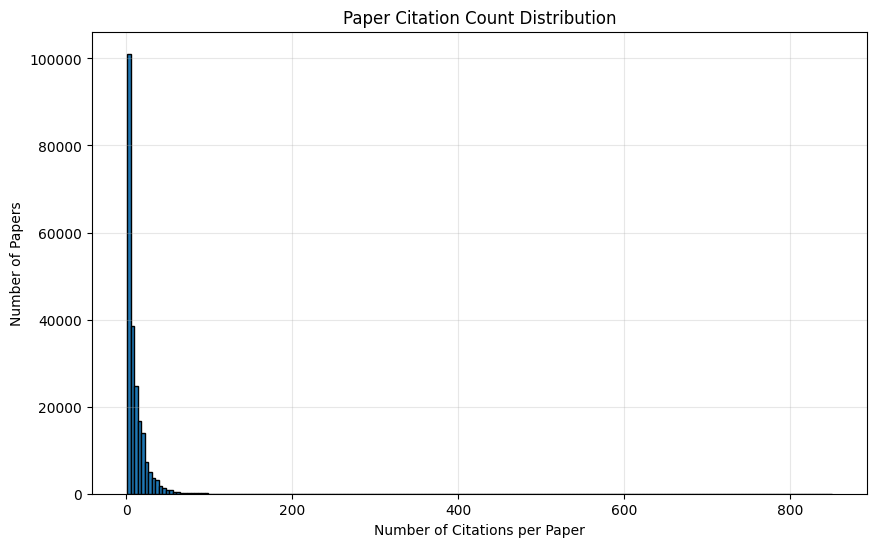

In [10]:
import  matplotlib.pyplot as plt
# 统计引用次数分布
cite_counts = edges_df['source'].value_counts()

# Plot citation count distribution
plt.figure(figsize=(10, 6))
plt.hist(cite_counts, bins=200, edgecolor='black')
plt.title('Paper Citation Count Distribution')
plt.xlabel('Number of Citations per Paper')
plt.ylabel('Number of Papers')
plt.grid(True, alpha=0.3)

# Add some statistics
print(f"Average citations per paper: {cite_counts.mean():.2f}")
print(f"Median citation count: {cite_counts.median():.2f}")
print(f"Maximum citations: {cite_counts.max()}")
print(f"Minimum citations: {cite_counts.min()}")
print("\nCitation count distribution:")
print(cite_counts.value_counts().sort_index().head())


## Text Embeddings

In [11]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

# 加载SciBERT模型和分词器
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')
model = AutoModel.from_pretrained('allenai/scibert_scivocab_uncased')
model.eval()

def get_scibert_embedding(text, max_length=512):
    """获取文本的SciBERT嵌入"""
    inputs = tokenizer(text, 
                      return_tensors="pt",
                      max_length=max_length,
                      truncation=True,
                      padding=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state
        mask = inputs['attention_mask'].unsqueeze(-1)
        masked_embeddings = embeddings * mask
        summed = torch.sum(masked_embeddings, dim=1)
        avg_embeddings = summed / torch.sum(mask, dim=1)
        
    return avg_embeddings.numpy()[0]

# 首先按DOI排序数据
sorted_df = merged_df.set_index('DOI').loc[idx_to_doi.values()].reset_index()

# 获取前三个节点的数据
test_samples = sorted_df.head(3)

print("测试前三个节点的文本嵌入：")
print("-" * 80)

for idx, row in test_samples.iterrows():
    print(f"Node {idx}:")
    print(f"DOI: {row['DOI']}")
    print(f"Title: {row['Title']}")
    print(f"Abstract: {row['Abstract'][:200]}...")  # 只显示摘要的前200个字符
    
    # 拼接文本并获取嵌入
    text = f"{row['Title']} [SEP] {row['Abstract']}"
    embedding = get_scibert_embedding(text)
    
    print(f"\n嵌入向量维度: {embedding.shape}")
    print(f"嵌入向量前10个值: {embedding[:10]}")
    print(f"嵌入向量L2范数: {np.linalg.norm(embedding):.4f}")
    print("-" * 80)

/home/zonic/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/zonic/miniconda3/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


测试前三个节点的文本嵌入：
--------------------------------------------------------------------------------
Node 0:
DOI: 10.1155/2018/4657079
Title: Moving unstable particles and special relativity
Abstract: In Poincare-Wigner-Dirac theory of relativistic interactions, boosts are dynamical. This means that - just like time translations - boost transformations have non-trivial effect on internal variables ...

嵌入向量维度: (768,)
嵌入向量前10个值: [-0.11566338 -0.24276529  0.06427854 -0.02517963  0.35934925 -0.11243405
  0.5584571   0.15690465 -0.2259914   0.17006728]
嵌入向量L2范数: 14.1689
--------------------------------------------------------------------------------
Node 1:
DOI: 10.1364/OL.43.000935
Title: Optical vector network analysis of ultra-narrow transitions in $^{166}$Er$^{3+}$:$^7$LiYF$_4$
Abstract: We present optical vector network analysis (OVNA) of an isotopically purified $^{166}$Er$^{3+}$:$^7$LiYF$_4$ crystal. The OVNA method is based on generation and detection of modulated optical sideband...

嵌入

In [12]:
# 保存排序后的DataFrame
sorted_df = merged_df.set_index('DOI').loc[idx_to_doi.values()].reset_index()
sorted_df.to_csv('raw/sorted_papers.csv', index=False)